Mariana Gómez Cuartas \
Universidad de Antioquia

<a href="https://colab.research.google.com/github/marianagomezcuartas/Relatividad/blob/main/codigos/cuaderno3(1.4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Librerías

In [1]:
%pip install -q matplotlib celluloid IPython ipywidgets pandas sympy

Note: you may need to restart the kernel to use updated packages.


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
from IPython.display import HTML
from ipywidgets import interact
import pandas as pd
import sympy as sp

from matplotlib.animation import FuncAnimation
import matplotlib.patches as patches


In [3]:
plt.rcParams.update({'font.size': 14})

# 1.4 El espacio tiempo de Minkowski

## Diagramas espacio-temporales, conos de luz y causalidad

Los diagramas de espaciotiempo (o diagramas de Minkowski) son herramientas gráficas que permiten visualizar eventos en relatividad especial, representando coordenadas de $ct$ (tiempo multiplicado por la velocidad de la luz) frente a $x$, ignorando $y$ y $z$. En estos diagramas, cada punto corresponde a un evento observado en un marco inercial $S$. Para analizar un segundo marco $S'$ en configuración estándar (movimiento relativo a velocidad $V$ a lo largo del eje $x$), los ejes $ct'$ y $x'$ de $S'$ se trazan sobre el diagrama de $S$. 

El eje $x'$ se define como el conjunto de eventos con $ct'$ = 0, y el eje $ct'$ corresponde a eventos con $x'$ = 0. Usando las transformaciones de Lorentz:

$$ct' = \gamma(V)(ct − Vx/c)$$ 
$$x' = \gamma(V)(x − Vt)$$

, estos ejes aparecen como rectas inclinadas en $S$, y que vienen dadas por las ecuaciones:

**Eje ct' :** $ct = (c/V) x$

**Eje x' :** $ct = (V/c) x$

Tal como se puede ver en las anteriores ecuaciones, esta ubicación de ejes va depender de la velocidad, y es algo que se puede visualizar en la siguiente animación:

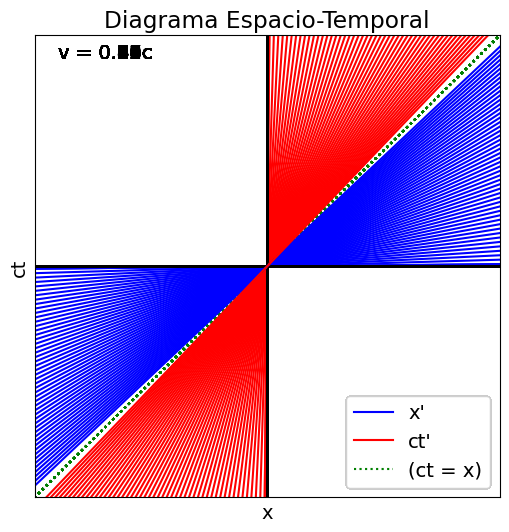

In [4]:
#parámetros
c = 1
frames = 20

#velocidades
v_vals = np.linspace(0.01, 0.95, 50)  # evitando v=0 que daría vertical en ct'
lim = 5

fig, ax = plt.subplots(figsize=(6, 6))
camera = Camera(fig)

#En S
xs = np.linspace(-20, 20, 50)

#ejes de s'
xs_prime = xs * v_vals/c
cts_prime = c * xs/v_vals

#para que salga el label
x_prime = xs * v_vals[0]/c
ct_prime = c * xs/v_vals[0]  
ax.plot(xs, x_prime, color='blue', linestyle='-', label="x'")  # eje x'
ax.plot(xs, ct_prime, color='red', linestyle='-', label="ct'")  # eje ct'
ax.plot(xs, xs, color='green', linestyle=':', label="(ct = x)")


for v in v_vals:
    gamma = 1 / np.sqrt(1 - v**2 / c**2)

    #sistema S
    ax.axhline(0, color='black', linewidth=1)  # eje x
    ax.axvline(0, color='black', linewidth=1)  # eje ct

    # Línea luz ct = x
    ax.plot(xs, xs, color='green', linestyle=':')

    #ejes de s'
    xs_prime = xs * v/c
    cts_prime = c * xs/v

    ax.plot(xs, xs_prime, color='blue', linestyle='-')  # eje x'
    ax.plot(xs, cts_prime, color='red', linestyle='-')  # eje ct'
    ax.text(-4.5, 4.5, f"v = {v:.2f}c")


    # Ajustes visuales
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_xlabel("x")
    ax.set_ylabel("ct")
    ax.set_title(f"Diagrama Espacio-Temporal")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.legend(loc="lower right")

    camera.snap()


In [5]:
# Crear animación
animation = camera.animate(interval=300, repeat=False)
HTML(animation.to_jshtml())

Particularmente, este diagrama muestra que la línea de gradiente 1 (donde $x = ct$ o $x' = ct'$), la cual representa el posible camino para la luz, es igual para todos los observadores inerciales, conforme al segundo postulado de la relatividad. A medida que la velocidad relativa $ V $ entre los marcos $ S $ y $ S' $ aumenta, los ejes $ x' $ y $ ct' $ de $ S' $ se aproximan a esta línea desde ambos lados, reflejando que las transformaciones de Lorentz no alteran la velocidad de la luz. En diagramas 3D (ct, x, y), esta línea se extiende a un **cono de luz**: eventos conectados al origen por señales luminosas, donde todos los observadores coinciden en qué eventos están dentro, sobre o fuera del cono, garantizando causalidad consistente. Cortes horizontales en un diagrama 4D (ct, x, y, z) en $ct = \text{constante} $, representan frentes de luz esféricos.

Por ejemplo en el siguiente diagrama espacio temporal, se ubican 4 eventos de la siguiente forma:

- El evento 0 se encuentra en el origen del marco de referencia $S$, que es el mismo que el origen del marco de referencia $S'$.
- El evento 1 se encuentra en unas coordenadas $(x_1, ct_1)$ en el marco de referencia $S$ y en $(x'_1, ct'_1)$ en el marco de referencia $S'$.
- El evento 2 es simultaneo al evento 1, y ocurre en el mismo lugar que el evento 0, pero ambos medidos en el marco de referencia $S'$.
- El evento 3 es simultaneo al evento 0, y ocurre en el mismo lugar que el evento 1, pero ambos medidos en el marco de referencia $S'$.

**Observación:** Para el desarrollo del siguente diagrama, se asigna el evento 0 a las coordenadas $(0,0)$, el evento 1 a unas coordendas arbitrarias $(x_1, ct_1)$, y las coordenadas de los eventos 2 y 3 se calculan por medio de tranformaciones de Lorentz, con base a la descripción del párrafo anterior. Las ecuaciones que se obtuvieron fueron las siguientes:

Para el evento 2:

$$ct_2 = \gamma^2(ct_1 - \frac{V}{c}x_1)$$
$$x_2 = \frac{V}{c} ct_2 $$

Para el evento 3:
$$x_3 = \gamma^2(x_1 - \frac{V}{c} ct_1)$$
$$ct_3 = \frac{V}{c} x_3 $$

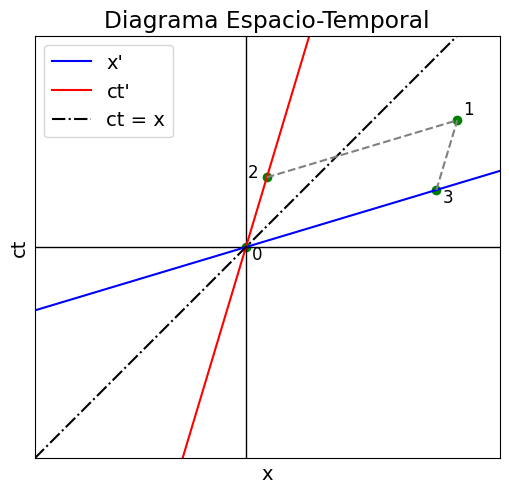

In [6]:

# Parámetros
v = 0.3  # velocidad en unidades de c
c = 1
gamma = 1 / np.sqrt(1 - v**2/c**2)


plt.figure(figsize=(6, 6))

# Ejes de S
lim = 5
xs = np.linspace(-lim, lim+1, 100)
plt.axhline(0, color='black', linewidth=1)  # eje x
plt.axvline(0, color='black', linewidth=1)  # eje ct

# Ejes de S'
xs_prime = xs * v/c
cts_prime = c * xs/v

plt.plot(xs, xs_prime, color='blue', linestyle='-', label="x'")  
plt.plot(xs, cts_prime, color='red', linestyle='-', label="ct'")  

# Línea de luz ct = x
plt.plot(xs, xs, color='black', linestyle='-.', label="ct = x")

# Eventos
# Evento 0 (x0, ct0)
x0, ct0 = 0, 0

# Evento 1 (x1, ct1)
x1, ct1 = 5, 3 

# Evento 2 --> x2'=x0' y ct2'=ct1'
ct2 = gamma**2 * (ct1 - v*x1/c)
x2 = v/c * ct2 

# Evento 3 --> x3'=x1' y ct3'=ct0'
x3 = gamma**2 * (x1 - v*ct1/c)
ct3 = v/c * x3

# Dibujar eventos
plt.scatter([x0, x1, x2, x3], [ct0, ct1, ct2, ct3], color='green')

# Etiquetas de eventos
dif = 0.15
plt.text(x0 + dif, ct0 - 2*dif, "0", fontsize=12)
plt.text(x1 + dif, ct1 + dif, "1", fontsize=12)
plt.text(x2 - 3*dif, ct2, "2", fontsize=12)
plt.text(x3 + dif, ct3 - 2*dif, "3", fontsize=12)

# Línea entre eventos 1 y 2
plt.plot([x2, x1], [ct2, ct1], color='gray', linestyle='--')

# Línea entre eventos 1 y 3
plt.plot([x3, x1], [ct3, ct1], color='gray', linestyle='--')

# Ajustes finales
plt.xlim(-lim, lim+1)
plt.ylim(-lim, lim)
plt.xlabel("x")
plt.ylabel("ct")
plt.xticks([])
plt.yticks([])
plt.title("Diagrama Espacio-Temporal")
plt.gca().set_aspect('equal')
plt.legend(loc="upper left")
plt.grid(False)

plt.show()


La **relatividad del orden temporal** muestra que eventos no causalmente conectados (fuera del cono de luz) pueden tener su secuencia invertida entre observadores inerciales, como ilustra el diagrama anterior: en $ S $, el orden es 0 → 3 → 2 → 1, mientras que en $ S'$, 0 y 3 son simultáneos y preceden a 2 y 1. Sin embargo, la **causalidad** se preserva para eventos dentro del cono de luz (como 0 y 2), donde todos los observadores coinciden en el orden temporal. Eventos fuera del cono (ej. 0 y 3) solo podrían vincularse mediante señales más rápidas que la luz, lo que es incompatible con la relatividad.  

El **cono de luz** es clave:  
- **Dentro del cono** (ej. 0 y 2): el orden temporal se preserva, garantizando que causas precedan a efectos.  
- **Fuera del cono** (ej. 0 y 1): no existe relación causal posible.  
- Cada evento tiene su propio cono de luz (no solo el origen), definiendo qué eventos pueden influir o ser influidos por él.  

## Separación espacio-temporal y la métrica de Minkowski

En el espacio tridimensional, la **distancia euclidiana** entre dos puntos es invariante bajo rotaciones del sistema de coordenadas. Se define como:  
$$(\Delta l)^2 = (\Delta x)^2 + (\Delta y)^2 + (\Delta z)^2,$$  
donde $ \Delta x, \Delta y, \Delta z $ son las diferencias en cada coordenada. Esta invariancia implica que cualquier rotación preserva la separación física, es decir:
$$(\Delta l)^2 = (\Delta l')^2,$$

En el **espaciotiempo de Minkowski** (4D), la **separación espacio-temporal** entre dos eventos se define como:  
$$(\Delta s)^2 = (c\,\Delta t)^2 - (\Delta x)^2 - (\Delta y)^2 - (\Delta z)^2.$$  
Este intervalo es invariante bajo transformaciones de Lorentz, asegurando que observadores inerciales \( O \) y \( O' \) (en marcos \( S \) y \( S' \)) midan:  
$$(\Delta s)^2 = (c\,\Delta t')^2 - (\Delta l')^2 = (\Delta s')^2.$$  

**Aunque difieran en coordenadas $ \Delta t $, $ \Delta x $, etc., coincidirán en $(\Delta s)^2 $.**  
  

---

Veamos los siguientes ejercicios, que son propuestos en el libro:

**Ejercicio 1.8**  
Dos eventos ocurren en las posiciones $(ct_1, x_1, y_1, z_1) = (3, 7, 0, 0)$ m y $(ct_2, x_2, y_2, z_2) = (5, 5, 0, 0)$ m. ¿Cuál es su separación en el espacio-tiempo?

In [7]:
def spacetime_separation(evento1, evento2):
    ct1, x1, y1, z1 = evento1
    ct2, x2, y2, z2 = evento2
    
    delta_ct = ct2 - ct1
    delta_x = x2 - x1
    delta_y = y2 - y1
    delta_z = z2 - z1
    return (delta_ct**2 - delta_x**2 - delta_y**2 - delta_z**2)

# Datos+ (coordenadas en metros)
evento1 = (3, 7, 0, 0)
evento2 = (5, 5, 0, 0)
s_squared = spacetime_separation(evento1, evento2)
print(f"Ejercicio 1.8: (Δs)^2 = {s_squared} m²")

Ejercicio 1.8: (Δs)^2 = 0 m²


**Ejercicio 1.9**: Demostrar que el intervalo espacio-temporal es invariante bajo transformaciones de Lorentz cuando $ \Delta y = \Delta z = 0 $.

**Solución**:

1. **Intervalo en el marco \( S \)**:
   Dado $ \Delta y = 0 $ y $ \Delta z = 0 $, el intervalo se simplifica a:
   $$
   (\Delta s)^2 = (c\,\Delta t)^2 - (\Delta x)^2.
   $$

2. **Transformaciones de Lorentz** (para $ \Delta t' $ y $ \Delta x' $):
   $$
   \Delta t' = \gamma \left( \Delta t - \frac{v\,\Delta x}{c^2} \right), \quad \Delta x' = \gamma \left( \Delta x - v\,\Delta t \right),
   $$
   donde $ \gamma = \frac{1}{\sqrt{1 - v^2/c^2}} $.

3. **Intervalo en el marco \( S' \)**:
   Calculamos $ (\Delta s')^2 = (c\,\Delta t')^2 - (\Delta x')^2 $:
   $$
   \begin{align*}
   (\Delta s')^2 &= c^2 \gamma^2 \left( \Delta t - \frac{v\,\Delta x}{c^2} \right)^2 - \gamma^2 \left( \Delta x - v\,\Delta t \right)^2 \\
   &= \gamma^2 \left[ c^2\Delta t^2 - 2v\,\Delta t \Delta x + \frac{v^2 (\Delta x)^2}{c^2} - (\Delta x^2 - 2v\,\Delta t \Delta x + v^2 \Delta t^2) \right].
   \end{align*}
   $$

4. **Simplificamos y agrupamos**:
   $$
   (\Delta s')^2 = \gamma^2 \left[ c^2\Delta t^2 \left(1 - \frac{v^2}{c^2}\right) - \Delta x^2 \left(1 - \frac{v^2}{c^2}\right) \right].
   $$

5. **Usando $ \gamma^2 = \frac{1}{1 - v^2/c^2} $:**
   $$
   (\Delta s')^2 = \frac{1}{1 - v^2/c^2} \left(1 - \frac{v^2}{c^2}\right) \left( c^2\Delta t^2 - \Delta x^2 \right) = (c\,\Delta t)^2 - (\Delta x)^2.
   $$

6. **Conclusión**:
   $$ (\Delta s')^2 = (\Delta s)^2. $$
   Por lo tanto, el intervalo espacio-temporal es invariante bajo transformaciones de Lorentz cuando $ \Delta y = \Delta z = 0 $.

---


La **separación espacio-temporal** en relatividad puede expresarse mediante la **métrica de Minkowski** $ \eta_{\mu\nu}  $, que codifica la estructura del espaciotiempo. Usando notación de suma:  
$$
(\Delta s)^2 = \sum_{\mu,\nu=0}^3 \eta_{\mu\nu} \, \Delta x^\mu \, \Delta x^\nu,
$$  
donde $ [\Delta x^\mu] = (c\Delta t, \Delta x, \Delta y, \Delta z) $ y la métrica se define como:  
$$
[\eta_{\mu\nu}] = 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 \\
0 & 0 & -1 & 0 \\
0 & 0 & 0 & -1
\end{pmatrix}.
$$  
- **Claves**:  
  1. La métrica se ha mostrado en forma matricial solo por conveniencia.  
  2. El signo de $ (\Delta s)^2 $ clasifica eventos en:  
     - **Tipo tiempo (temporaloide)** ($ (\Delta s)^2 > 0 $): Eventos relacionados causalmente.
     - **Tipo luz (luminoide)** ($ (\Delta s)^2 = 0 $): Eventos relacionados causalmente, y en el cual todos los observadores coinciden en que los eventos pueden estar unidos por una señal de luz. (sobre el cono de luz).
     - **Tipo espacio (espacioide)** ($ (\Delta s)^2 < 0 $): Sin relación causal. (hay eventos que están fuera del cono de luz).

El **tiempo propio** $\Delta \tau$ se determina mediante la **separación espacio-temporal invariante** $(\Delta s)^2$ a lo largo de la **línea de mundo** de una partícula (su trayectoria en el espaciotiempo), mediante la ecuación: $(\Delta \tau)^2 = (\Delta s)^2 / c^2$. La convención de signos adoptada aquí asigna $+$ a $(c\Delta t)^2$ y $-$ a las coordenadas espaciales, asegurando que eventos en trayectorias sublumínicas tengan $(\Delta s)^2 > 0$. Nota: otros autores usan la convención opuesta ($-+++$), por lo que es esencial verificar la notación al consultar fuentes externas.  

## El efecto de los gemelos



El **efecto de los gemelos** ilustra las implicaciones de la dilatación temporal en la relatividad especial. Dos gemelas, Astra (viajera) y Terra (terrestre), experimentan envejecimiento diferencial debido a los movimientos relativos. Desde la perspectiva de Terra, el reloj de Astra se ralentiza durante su viaje de ida y vuelta a velocidades cercanas a la luz, lo que explica que Astra regrese más joven. Sin embargo, la aparente paradoja surge al considerar el marco de Astra: ¿no debería ella observar que Terra envejece menos? La clave radica en que **la simetría entre los marcos se rompe** porque Astra experimenta aceleraciones al cambiar de dirección, mientras Terra permanece en un marco inercial (aproximadamente). 

La resolución del efecto utiliza tres marcos inerciales:  
1. **Terra** (fijo en la Tierra).  
2. **Astra** (viaje de ida, velocidad $V$).  
3. **Stella** (viaje de vuelta, velocidad $-V$).  
Astra salta abruptamente entre naves en el punto de retorno (evento 1), evitando complicaciones con aceleraciones prolongadas. Aunque el cambio es idealizado, muestra que solo Terra mantiene un marco inercial continuo. El evento en el cual Astra y Terra se encuentran de nuevo es el evento 2.


**Observación:** La primera celda de código que se muestra a continuación fue hecha con celluloid, sin embargo, por el timepo de ejecución que toma, se usó claude 3.7 sonet, para convertirla a una animación que funcione con FuncAnimation de  matplotlib.animation

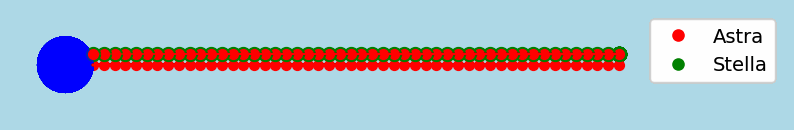

In [36]:
#@title con celluloid

# Configuración inicial
fig = plt.figure(figsize=(10, 5), facecolor='lightblue')
ax = fig.add_subplot(111)
ax.set_xlim(-6, 8)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')  
ax.axis('off')

camera = Camera(fig)

# crear el dibujo de la Tierra
tierra = plt.Circle((-5, 0), 0.5, color='blue', alpha=0.7)

# Parámetros de animación
num_frames = 100   #(50 de ida y 50 de vuelta)
pos_inicial = np.array([[-4.5, 0]])  # Superficie derecha de la Tierra

# Trayectorias
x_ida = np.linspace(-4.5, 5, num_frames//2)
y_ida = np.zeros(num_frames//2)

x_vuelta = np.linspace(5, -4.5, num_frames//2)
y_vuelta = np.full(num_frames//2, 0.2)  #arreglo de 100 elementos con valor 0.2

# Listas para almacenar trayectorias
camino_ida = []
camino_vuelta = []

ax.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='red', label='Astra', linestyle='', markersize=8),
    plt.Line2D([0], [0], marker='o', color='green', label='Stella', linestyle='', markersize=8)], loc='upper right')

for i in range(num_frames):
    # Actualizar posición
    if i < num_frames//2:
        #stella
        ax.scatter(x_vuelta[0], y_vuelta[0], color='green', s=100) # punto de vuelta esperando
        #coordenadas de ida
        x = x_ida[i]
        y = y_ida[i]
        # Agregar segmento a trayectoria de ida  
        camino_ida.append([x, y])
    else:
        #coordenadas de vuelta
        x = x_vuelta[i - num_frames//2]
        y = y_vuelta[i - num_frames//2]
        #stella
        ax.scatter(x, y, color='green', s=100)
        # Agregar segmento a trayectoria de vuelta
        camino_vuelta.append([x, y])
    

    #tierra
    ax.add_patch(tierra)
    
    #punto
    ax.scatter(x, y, color='red', s=50)  # Dibujar punto
    
    # camino
    if len(camino_ida) > 1:
        ax.plot(*zip(*camino_ida), color='red', alpha=0.3)
    if len(camino_vuelta) > 1:
        ax.plot(*zip(*camino_vuelta), color='red', alpha=0.3)
    
    camera.snap()

# Generar animación
#animation = camera.animate(interval=150, repeat=False)
#HTML(animation.to_jshtml())

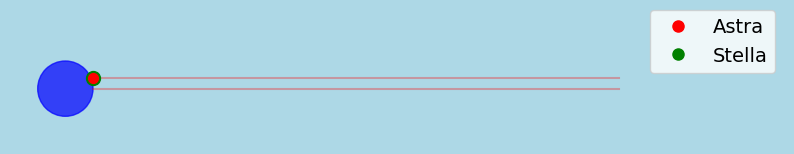

In [37]:
# Configuración inicial
fig, ax = plt.subplots(figsize=(10, 5), facecolor='lightblue')
ax.set_xlim(-6, 8)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')
ax.axis('off')

# Crear el dibujo de la Tierra
tierra = plt.Circle((-5, 0), 0.5, color='blue', alpha=0.7)
ax.add_patch(tierra)

# Parámetros de animación
num_frames = 50
pos_inicial = np.array([[-4.5, 0]])

# Trayectorias
x_ida = np.linspace(-4.5, 5, num_frames//2)
y_ida = np.zeros(num_frames//2)
x_vuelta = np.linspace(5, -4.5, num_frames//2)
y_vuelta = np.full(num_frames//2, 0.2)

# Para la leyenda - movido más arriba para no tapar los puntos
ax.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='red', label='Astra', linestyle='', markersize=8),
    plt.Line2D([0], [0], marker='o', color='green', label='Stella', linestyle='', markersize=8)], 
    loc='upper right', bbox_to_anchor=(1.0, 1.3))

# Crear líneas y puntos vacíos para actualizar
linea_ida, = ax.plot([], [], color='red', alpha=0.3)
linea_vuelta, = ax.plot([], [], color='red', alpha=0.3)
punto_astra = ax.scatter([], [], color='red', s=50, zorder=3)  # Mayor zorder para estar encima
punto_stella = ax.scatter([], [], color='green', s=100, zorder=2)

def init():
    linea_ida.set_data([], [])
    linea_vuelta.set_data([], [])
    punto_astra.set_offsets(np.empty((0, 2)))
    punto_stella.set_offsets(np.empty((0, 2)))
    return linea_ida, linea_vuelta, punto_astra, punto_stella

def update(frame):
    if frame < num_frames//2:
        # Ida
        x = x_ida[frame]
        y = y_ida[frame]
        linea_ida.set_data(x_ida[:frame+1], y_ida[:frame+1])
        punto_astra.set_offsets([[x, y]])
        punto_stella.set_offsets([[x_vuelta[0], y_vuelta[0]]])
    else:
        # Vuelta
        idx = frame - num_frames//2
        x = x_vuelta[idx]
        y = y_vuelta[idx]
        linea_vuelta.set_data(x_vuelta[:idx+1], y_vuelta[:idx+1])
        
        # Importante: primero dibujar Stella (verde) y luego Astra (rojo)
        # para que Astra quede encima de Stella
        punto_stella.set_offsets([[x, y]])
        punto_astra.set_offsets([[x, y]])
    
    return linea_ida, linea_vuelta, punto_stella, punto_astra  

# Crear la animación 
ani = FuncAnimation(fig, update, frames=num_frames, init_func=init, 
                    blit=True, interval=200)


from IPython.display import HTML
HTML(ani.to_jshtml())

Los marcos en esta situación se definen de tal forma que:

- En el evento 0, los origenes de Terra y Astra coinciden.
- En el evento 1, los origenes de Astra y Stella coinciden.
- En el evento 2, los origenes de Terra y Stella coinciden.

En el siguiente diagrama para el marco de terra, se ilustran estos eventos:

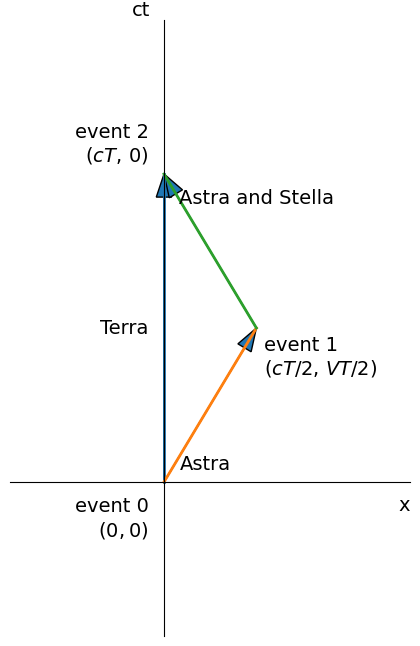

In [44]:
# Parámetros ajustables
T = 2.0
V = 0.6
c = 1.0

# Coordenadas de los eventos
e0 = (0, 0)
e1 = (V * T / 2, c * T / 2)
e2 = (0, c * T)

fig, ax = plt.subplots(figsize=(6,8))

# hacer los ejes, con los bordes de la figura
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# sin marcas en los ejes
ax.set_xticks([])
ax.set_yticks([])

# Trayectoria de Terra
ax.plot([0, 0], [0, c * T], linewidth=2)
ax.text(-0.1, c * T / 2, 'Terra', ha='right', va='center')

# Trayectoria de Astra (ida)
ax.plot([e0[0], e1[0]], [e0[1], e1[1]], linewidth=2)
ax.text(e0[0] + 0.1, e0[1] + 0.05, 'Astra', ha='left', va='bottom')

# Trayectoria de Astra y Stella (vuelta)
ax.plot([e1[0], e2[0]], [e1[1], e2[1]], linewidth=2)
ax.text(e2[0] + 0.1, e2[1] - 0.1, 'Astra and Stella', ha='left', va='top')

# Anotaciones de eventos
ax.text(e0[0] - 0.1, e0[1] - 0.1, 'event 0\n$(0,0)$', ha='right', va='top')
ax.text(e1[0] + 0.05, e1[1] - 0.05, 'event 1\n$(cT/2,\,VT/2)$', ha='left', va='top')
ax.text(e2[0] - 0.1, e2[1] + 0.05, 'event 2\n$(cT,\,0)$', ha='right', va='bottom')

#flechas
ax.arrow(*e0, e2[0]-e0[0], e2[1]-e0[1], head_width=0.1, length_includes_head=True)
ax.arrow(*e0, e1[0]-e0[0], e1[1]-e0[1], head_width=0.1, length_includes_head=True)
ax.arrow(*e1, e2[0]-e1[0], e2[1]-e1[1], head_width=0.1, length_includes_head=True)


# Etiquetas de ejes
ax.set_xlabel('x', loc='right', labelpad=10)
ax.set_ylabel('ct', loc='top', labelpad=10, rotation=0)

# Aspecto y límites
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-1, max(e1[0], 0) + 1)
ax.set_ylim(-1, c * T + 1)

plt.show()


Del diagrama anterior, se observa que el tiempo propio de Terra es T. Ahora bien, para calcular el tiempo propio de Astra, es necesario cacular el timepo propio entre los eventos 0 y 1, y entre los eventos 1 y 2. Para esto, se hace uso de la relación $(\Delta \tau)^2 = (\Delta s)^2 /c^2$, y se tiene en cuenta que el tiempo propio es un invariante, es decir, se puede calcular desde el marco de Terra sin ningún problema.

Se encuentra que:

$$(\Delta \tau _{0,1} = \frac{T}{2\gamma})$$
$$(\Delta \tau _{1,2} = \frac{T}{2\gamma})$$

Con lo cual, el tiempo propio acumulado por Astra es:
$$(\Delta \tau _{0,2} = \Delta \tau _{0,1} + \Delta \tau _{1,2} = \frac{T}{\gamma})$$

Y tal como es esperado, Astra es más joven que Terra al final de su viaje.

Es importante notar que la razón por la cual Terra y Astra están en desacuerdo con el tiempo propio entre 0 y 2, es que Astra **no es un observador inercial**, pues está sometida a una aceleración que Terra no siente.